In [2]:
from shapely.geometry import Point, LineString, Polygon
from shapely.ops import cascaded_union, polygonize
from shapely import speedups

import geopandas as gpd

if speedups.available:
    speedups.enable()

class GeoSpatialData:
    def __init__(self, geometry, attributes=None):
        self.geometry = geometry
        self.attributes = attributes if attributes else {}

    def calculate_distance(self, other):
        return self.geometry.distance(other.geometry)

    def calculate_area(self):
        return self.geometry.area

    def buffer(self, distance):
        buffered_geometry = self.geometry.buffer(distance)
        return GeoSpatialData(buffered_geometry, self.attributes)

    def intersection(self, other):
        intersection_geometry = self.geometry.intersection(other.geometry)
        return GeoSpatialData(intersection_geometry)

    def union(self, other):
        union_geometry = cascaded_union([self.geometry, other.geometry])
        return GeoSpatialData(union_geometry)

    def difference(self, other):
        difference_geometry = self.geometry.difference(other.geometry)
        return GeoSpatialData(difference_geometry)

    def to_polygon(self):
        if isinstance(self.geometry, Polygon):
            return self
        elif isinstance(self.geometry, LineString):
            polygon = Polygon(list(self.geometry.coords))
            return GeoSpatialData(polygon, self.attributes)
        else:
            raise ValueError("Cannot convert geometry to polygon.")

    def visualize(self):
        import matplotlib.pyplot as plt

        fig, ax = plt.subplots()
        ax.set_aspect('equal')

        if isinstance(self.geometry, Point):
            ax.plot(self.geometry.x, self.geometry.y, 'ro')
        elif isinstance(self.geometry, LineString):
            x, y = self.geometry.xy
            ax.plot(x, y, 'b-')
        elif isinstance(self.geometry, Polygon):
            x, y = self.geometry.exterior.xy
            ax.fill(x, y, alpha=0.5)
            ax.plot(x, y, 'b-')
        else:
            raise ValueError("Cannot visualize geometry.")

        plt.show()

C:\Users\tlecae\AppData\Local\Temp\ipykernel_11288\589156665.py:8: DeprecationWarning: This function has no longer any effect, and will be removed in a future release. Starting with Shapely 2.0, equivalent speedups are always available
  speedups.enable()


In [3]:
# Read the shapefile using GeoPandas
shapefile_path = "C:/_DATA/AGR/RPG/2021/r27.shp"
gdf = gpd.read_file(shapefile_path)

# Create a list to store the GeoSpatialData instances
geospatial_data_list = []

# Iterate over each feature in the GeoDataFrame
for index, row in gdf.iterrows():
    geometry = row.geometry
    attributes = row.drop('geometry').to_dict()
    
    # Create a GeoSpatialData instance for each feature
    geospatial_data = GeoSpatialData(geometry, attributes)
    
    # Add the GeoSpatialData instance to the list
    geospatial_data_list.append(geospatial_data)

# Access the attributes of the first feature
first_feature = geospatial_data_list[0]
print(first_feature.attributes)

{'ID_PARCEL': '47651', 'SURF_PARC': 2.91, 'CODE_CULTU': 'PPH', 'CODE_GROUP': '18', 'CULTURE_D1': None, 'CULTURE_D2': None}


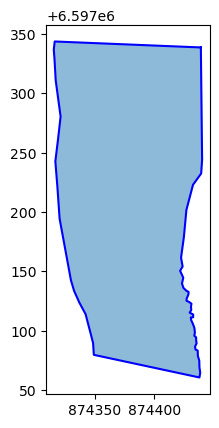

In [5]:
first_feature.visualize()